In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!cp -r /content/drive/MyDrive/esmini.zip /content/esmini.zip
!unzip /content/esmini.zip

In [3]:
%%capture
!apt-get install -y xvfb x11-utils
!pip install ultralytics

In [4]:
import sys, os
!wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/xvfb -O ../xvfb
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'
!cp -r /content/drive/MyDrive/xvfb /content/xvfb
!chmod 755 /content/xvfb

Starting virtual X frame buffer: Xvfb.


In [ ]:
%rm -r sim_loop

In [5]:
!/content/xvfb start
%cd /content/esmini
!chmod 755 bin/esmini
%cd /content
!git clone https://github.com/patrickw16/sim_loop.git

Starting virtual X frame buffer: Xvfb.
/content/esmini
/content
Cloning into 'sim_loop'...
remote: Enumerating objects: 3625, done.
remote: Counting objects: 100% (577/577), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 3625 (delta 487), reused 520 (delta 448), pack-reused 3048 (from 1)
Receiving objects: 100% (3625/3625), 87.29 MiB | 27.12 MiB/s, done.
Resolving deltas: 100% (3136/3136), done.
Updating files: 100% (3322/3322), done.


In [7]:
#....
%cd odd_coverage
!git checkout ThreeDimensional
%cd /content

Cloning into 'odd_coverage'...
remote: Enumerating objects: 2809, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 2809 (delta 26), reused 28 (delta 11), pack-reused 2758 (from 1)
Receiving objects: 100% (2809/2809), 44.42 MiB | 25.30 MiB/s, done.
Resolving deltas: 100% (2232/2232), done.
Updating files: 100% (4838/4838), done.
/content/odd_coverage
Branch 'ThreeDimensional' set up to track remote branch 'ThreeDimensional' from 'origin'.
Switched to a new branch 'ThreeDimensional'
/content


In [8]:
%%capture
!sudo apt install texlive texlive-latex-extra texlive-fonts-recommended dvipng
!pip install latex
!sudo apt install cm-super

I adjusted the rate to:0.0033333333333333335
1 3.0943148929274225e-05
I adjusted the rate to:0.0044444444444444444
I adjusted the rate to:0.005925925925925926
I adjusted the rate to:0.007901234567901235
2 3.046786851912534e-05
I adjusted the rate to:0.010534979423868314
3 2.8230251509993753e-05
4 2.7351026073422585e-05
I will break since no more clusters in red zone.
I successfully finished. There are 1 successful attempts.
Gradient:-0.6729142365932217
b value:0.02952091346688786
[[27.78067731 24.62192941  3.2226933 ]
 [35.12162398 32.72509433  6.15320151]
 [56.93595078 25.51464436  3.32299334]
 [54.05065644 13.75959991  5.18943014]
 [16.53045848 34.69374072  6.8364246 ]
 [34.84539837 12.52791766  4.99174152]
 [42.51824332 35.07648188  4.55434778]
 [30.00714516 18.49627494  6.77445726]
 [16.63211452 12.71889697  4.87353756]
 [13.89620591 33.03828798  4.9398769 ]
 [58.03827237 26.78278842  6.1281541 ]
 [54.99964782 15.75342274  3.3990532 ]
 [54.87039018 30.82891665  4.22175635]
 [46.404

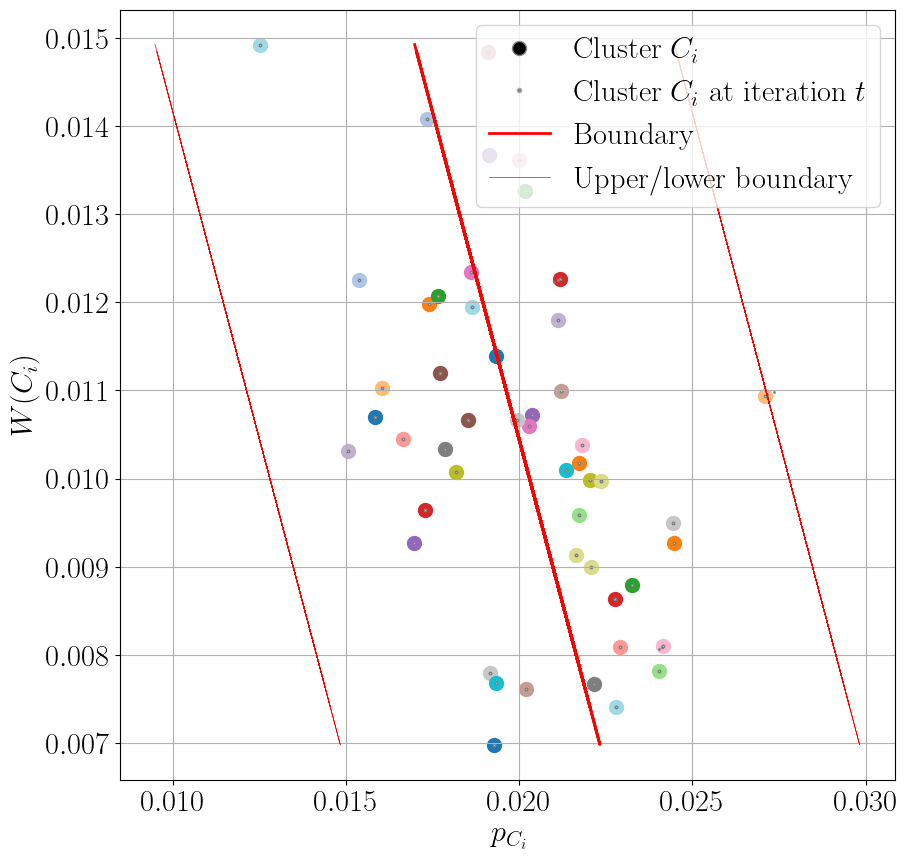

In [9]:
# Generate variance bounded test cases
import numpy as np
from PIL import Image
from IPython.core.display import SVG
from sim_loop.evaluation.cube_based_evaluation import CubeBasedEvaluation
from odd_coverage.odd_coverage.coverage_param_lvl.coverage_param_lvl import CoverageParamLvl

#Generate evaluation points:
my_coverage_param = CoverageParamLvl(
                    number_of_test_values=50,
                    trace_epsilon=0.0075,
                    epsilon_buffer=0.005,
                    number_of_attempts=1,
                    combined_points_data_path='./sim_loop/evaluation/variance_bounded_testing_method/data/prior_points_s_delta_v_delta_ego_max_dec.npy')

param_values, cov_contribution, updated_cluster_traces, adapted_kmeans_labels, re_sampled_scaled, scaler, weighted_within_variance = my_coverage_param.get_optimised_values(plot_path='/content/var_poc_3d_example.svg')

print(param_values)

points = scaler.inverse_transform(re_sampled_scaled)

#SVG(filename='/content/var_poc_3d_example.svg')

In [11]:
# Generate scenarios
from sim_loop.evaluation.variance_bounded_testing_method.simulation.parameter_set_generation import modify_xml

for idx, parameter in enumerate(param_values):

    new_s_delta = param_values[idx, 0]  # New value for s_delta
    new_v_delta = param_values[idx, 1]  # New value for v_delta
    new_a_dec = param_values[idx, 2]  # New value for a_dec

    input_file = '/content/sim_loop/scenarios/cut-in.xosc'  # Replace with your input file path
    output_file = f'/content/sim_loop/scenarios/variance_bounded/{idx}_{new_a_dec}_cut-in.xosc'  # Replace with your desired output file path

    modify_xml(input_file, output_file, new_s_delta, new_v_delta)

In [26]:
from multiprocessing.pool import ThreadPool
import subprocess
import sys
import os.path

# globals
launched = 0
done = 0
n_runs = 0

def print_status():
    print('Launched: {}/{} Done: {}'.format(launched, n_runs, done), end='\r', flush=True)

def launch_scenario(index):
    global launched
    global done
    launched += 1
    print_status()
    p = subprocess.run(
        ['python'] + ['/content/sim_loop/evaluation/variance_bounded_testing_method/simulation/variance_bounded_colab_execution.py'] + ['--window'] + [str(60)] + [str(60)] + [str(800)] + [str(400)] + ['--headless'] + ['--osc'] + [f'/content/sim_loop/scenarios/variance_bounded/{str(index)}_{str(param_values[index, 2])}_cut-in.xosc'] + ['--logfile_path'] + [f'/content/{str(index)}_log.txt'],
    )

    done += 1
    print_status()


if __name__ == '__main__':

    #n_runs = len(param_values)
    print_status()

    n_runs = 3

    with ThreadPool() as p:
        p. map(launch_scenario, range(n_runs))

    print()

In [24]:
!python /content/sim_loop/evaluation/variance_bounded_testing_method/simulation/variance_bounded_colab.py --window 60 60 800 400 --headless

esmini GIT REV: v2.40.3-0-9fa4bae8
esmini GIT TAG: v2.40.3
esmini GIT BRANCH: tags/v2.40.3^0
esmini BUILD VERSION: N/A - client build
Player arguments:  /content/sim_loop/evaluation/variance_bounded_testing_method/simulation/variance_bounded_colab_execution.py --window 60 60 800 400 --headless --osc /content/sim_loop/scenarios/variance_bounded/0_3.2226932980315675_cut-in.xosc --logfile_path /content/0_log.txt
Custom logfile path: /content/0_log.txt
esmini GIT REV: v2.40.3-0-9fa4bae8
esmini GIT TAG: v2.40.3
esmini GIT BRANCH: tags/v2.40.3^0
esmini BUILD VERSION: N/A - client build
No fixed timestep specified - running in realtime speed
Generated seed 240937799
Loading /content/sim_loop/scenarios/variance_bounded/0_3.2226932980315675_cut-in.xosc (v1.1)
0 variables
Unsupported geo reference attr: +no_defs
Unsupported object type: rail-pole - interpret as NONE
Unsupported object type: rail-pole - interpret as NONE
Unsupported object type: guide-post - interpret as NONE
Unsupported object t

In [12]:
!python /content/sim_loop/evaluation/variance_bounded_testing_method/simulation/variance_bounded_colab_execution.py --window 60 60 800 400 --headless --osc /content/sim_loop/scenarios/variance_bounded/0_3.2226932980315675_cut-in.xosc

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
esmini GIT REV: v2.40.3-0-9fa4bae8
esmini GIT TAG: v2.40.3
esmini GIT BRANCH: tags/v2.40.3^0
esmini BUILD VERSION: N/A - client build
Player arguments:  /content/sim_loop/evaluation/variance_bounded_testing_method/simulation/variance_bounded_colab_execution.py --window 60 60 800 400 --headless --osc /content/sim_loop/scenarios/variance_bounded/0_3.2226932980315675_cut-in.xosc
esmini GIT REV: v2.40.3-0-9fa4bae8
esmini GIT TAG: v2.40.3
esmini GIT BRANCH: tags/v2.40.3^0
esmini BUILD VERSION: N/A - client build
No fixed timestep specified - running in realtime speed
Generated seed 1863211189
Loading /content/sim_loop/scenarios/variance_bounded/0_3.2226932980315675_cut-in.xosc (v1.1)
0

In [ ]:
# analyze logs and store results

In [ ]:
%mkdir logs

In [ ]:
# prompt: move all log files to logs folder

import shutil
import glob

# Move all log files to the logs folder
log_files = glob.glob("*.txt")  # Find all files ending with .log in the current directory
for log_file in log_files:
  try:
    shutil.move(log_file, "logs/")  # Move the file to the logs/ directory
  except FileNotFoundError:
    print(f"Error: The 'logs' directory does not exist.")
  except shutil.Error as e:
    print(f"Error moving file {log_file}: {e}")

In [ ]:
%rm -r logs_old

In [ ]:
# prompt: zip the logs folder

import shutil
import os

def zip_logs():
  # Check if the logs directory exists
  if os.path.exists("logs"):
    try:
      shutil.make_archive("logs", "zip", "logs")
      print("Logs folder zipped successfully to logs.zip")
    except Exception as e:
      print(f"Error zipping logs folder: {e}")
  else:
    print("Error: logs folder not found.")

zip_logs()

Logs folder zipped successfully to logs.zip
